# Potato Disease Classification

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
IMAGE_SIZE = 224
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 224  

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  
    rotation_range=10,
    horizontal_flip=True  
)

train_generator = train_datagen.flow_from_directory(
    r'D:\Study\plant disease project\Training\dataset\train',  
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  
    batch_size=32,  
    class_mode='sparse',  
    shuffle=True  
)


print("Class indices:", train_generator.class_indices)


Found 1506 images belonging to 3 classes.
Class indices: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break


[[[0.66827774 0.59376794 0.6094542 ]
  [0.67159545 0.59708565 0.6127719 ]
  [0.61433    0.5398202  0.55550647]
  ...
  [0.58470994 0.51020014 0.5258864 ]
  [0.5989209  0.5244111  0.54009736]
  [0.6131319  0.5386221  0.55430835]]

 [[0.6651197  0.5906099  0.6062962 ]
  [0.6769641  0.6024543  0.6181406 ]
  [0.617488   0.5429782  0.5586645 ]
  ...
  [0.73357123 0.65906143 0.6747477 ]
  [0.735466   0.6609562  0.6766425 ]
  [0.7373608  0.662851   0.67853725]]

 [[0.66196173 0.58745193 0.6031382 ]
  [0.6823327  0.6078229  0.62350917]
  [0.620646   0.5461362  0.5618225 ]
  ...
  [0.73388726 0.65937746 0.6750637 ]
  [0.72504485 0.65053505 0.6662213 ]
  [0.7162025  0.6416927  0.657379  ]]

 ...

 [[0.6928645  0.63404095 0.6536488 ]
  [0.6893907  0.63056713 0.65017503]
  [0.6859169  0.6270934  0.6467012 ]
  ...
  [0.73381764 0.667151   0.6906804 ]
  [0.695742   0.62907535 0.65260476]
  [0.68698055 0.6203139  0.6438433 ]]

 [[0.74075305 0.6819295  0.7015374 ]
  [0.7483322  0.6895087  0.7091165 ]


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMAGE_SIZE = 224  


validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  
    rotation_range=10,  
    horizontal_flip=True  
)


validation_generator = validation_datagen.flow_from_directory(
    r'D:\Study\plant disease project\Training\dataset\val',  
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  
    batch_size=32,  
    class_mode='sparse',  
    shuffle=False  
)


print("Validation class indices:", validation_generator.class_indices)


Found 215 images belonging to 3 classes.
Validation class indices: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMAGE_SIZE = 224  


test_datagen = ImageDataGenerator(
    rescale=1.0 / 255  
)


test_generator = test_datagen.flow_from_directory(
    r'D:\Study\plant disease project\Training\dataset\test',  
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  
    batch_size=32, 
    class_mode='sparse', 
    shuffle=False 
)


print("Test class indices:", test_generator.class_indices)


Found 431 images belonging to 3 classes.
Test class indices: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.73333335 0.7254902  0.7803922 ]
  [0.7372549  0.7294118  0.7843138 ]
  [0.7372549  0.7294118  0.7843138 ]
  ...
  [0.7725491  0.7686275  0.8235295 ]
  [0.76470596 0.7607844  0.81568635]
  [0.75294125 0.7490196  0.80392164]]

 [[0.7490196  0.7411765  0.7960785 ]
  [0.74509805 0.7372549  0.79215693]
  [0.73333335 0.7254902  0.7803922 ]
  ...
  [0.7411765  0.7372549  0.79215693]
  [0.73333335 0.7294118  0.7843138 ]
  [0.7294118  0.7254902  0.7803922 ]]

 [[0.6901961  0.68235296 0.7372549 ]
  [0.6901961  0.68235296 0.7372549 ]
  [0.6901961  0.68235296 0.7372549 ]
  ...
  [0.7254902  0.72156864 0.77647066]
  [0.72156864 0.7176471  0.7725491 ]
  [0.7254902  0.72156864 0.77647066]]

 ...

 [[0.49803925 0.47058827 0.53333336]
  [0.46274513 0.43529415 0.49803925]
  [0.5254902  0.49803925 0.56078434]
  ...
  [0.43921572 0.42352945 0.48235297]
  [0.5294118  0.5137255  0.57254905]
  [0.6039216  0.5882353  0.64705884]]

 [[0.41176474 0.38431376 0.44705886]
  [0.5019608  0.47450984 0.5372549 ]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

c:\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,459 (669.76 KB)

 Trainable params: 171,459 (669.76 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
1506/32

47.0625

In [14]:
215/32

6.71875

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=50,
)

Epoch 1/50


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 303s 6s/step - accuracy: 0.4763 - loss: 0.9248 - val_accuracy: 0.7552 - val_loss: 0.8149
Epoch 2/50
 1/47 ━━━━━━━━━━━━━━━━━━━━ 2:01 3s/step - accuracy: 0.5938 - loss: 0.8945

c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5938 - loss: 0.8945 - val_accuracy: 0.1739 - val_loss: 1.5261
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.5629 - loss: 0.8244 - val_accuracy: 0.7292 - val_loss: 0.6603
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7812 - loss: 0.7720 - val_accuracy: 0.3043 - val_loss: 1.1569
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.7293 - loss: 0.6130 - val_accuracy: 0.7448 - val_loss: 0.5987
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7500 - loss: 0.5590 - val_accuracy: 0.3043 - val_loss: 1.2670
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.7581 - loss: 0.6141 - val_accuracy: 0.7448 - val_loss: 0.5379
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6875 - loss: 0.5446 - val_accuracy: 0.3478 - val_loss: 1.0262
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.8087 - loss: 0.4541 - val_accuracy: 0.8906 - val_loss: 0.28

In [16]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9435 - loss: 0.1484


In [17]:
scores

[0.3216603398323059, 0.874709963798523]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [18]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [19]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 47}

In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

50

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8972479104995728,
 0.8945029973983765,
 0.8037591576576233,
 0.7720071077346802,
 0.6040736436843872]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.7552083134651184,
 0.17391304671764374,
 0.7291666865348816,
 0.30434781312942505,
 0.7447916865348816,
 0.30434781312942505,
 0.7447916865348816,
 0.3478260934352875,
 0.890625,
 0.8260869383811951,
 0.8489583134651184,
 0.95652174949646,
 0.9166666865348816,
 0.9130434989929199,
 0.9427083134651184,
 0.95652174949646,
 0.9270833134651184,
 0.95652174949646,
 0.9322916865348816,
 0.8695651888847351,
 0.9635416865348816,
 0.95652174949646,
 0.9375,
 0.95652174949646,
 0.9583333134651184,
 0.95652174949646,
 0.9739583134651184,
 0.95652174949646,
 0.9791666865348816,
 0.8695651888847351,
 0.9739583134651184,
 0.95652174949646,
 0.953125,
 0.95652174949646,
 0.9479166865348816,
 0.95652174949646,
 0.921875,
 0.9130434989929199,
 0.9791666865348816,
 0.9130434989929199,
 0.984375,
 0.95652174949646,
 0.9791666865348816,
 0.8695651888847351,
 0.9322916865348816,
 0.95652174949646,
 0.9895833134651184,
 1.0,
 0.9583333134651184,
 0.9130434989929199]

In [26]:
acc

[0.48168250918388367,
 0.59375,
 0.5746268630027771,
 0.78125,
 0.7381275296211243,
 0.75,
 0.759158730506897,
 0.6875,
 0.8439620137214661,
 0.90625,
 0.9050203561782837,
 0.9375,
 0.9199457168579102,
 0.90625,
 0.9206241369247437,
 1.0,
 0.9294437170028687,
 0.90625,
 0.9294437170028687,
 0.96875,
 0.9443690776824951,
 0.90625,
 0.9654002785682678,
 0.84375,
 0.9789687991142273,
 0.96875,
 0.9579375982284546,
 0.90625,
 0.9681139588356018,
 1.0,
 0.9714095592498779,
 1.0,
 0.9626865386962891,
 0.9375,
 0.9694707989692688,
 0.90625,
 0.9810040593147278,
 0.90625,
 0.9674355387687683,
 1.0,
 0.9877883195877075,
 1.0,
 0.9830393195152283,
 0.96875,
 0.9701492786407471,
 0.96875,
 0.9850746393203735,
 0.96875,
 0.974219799041748,
 0.96875]

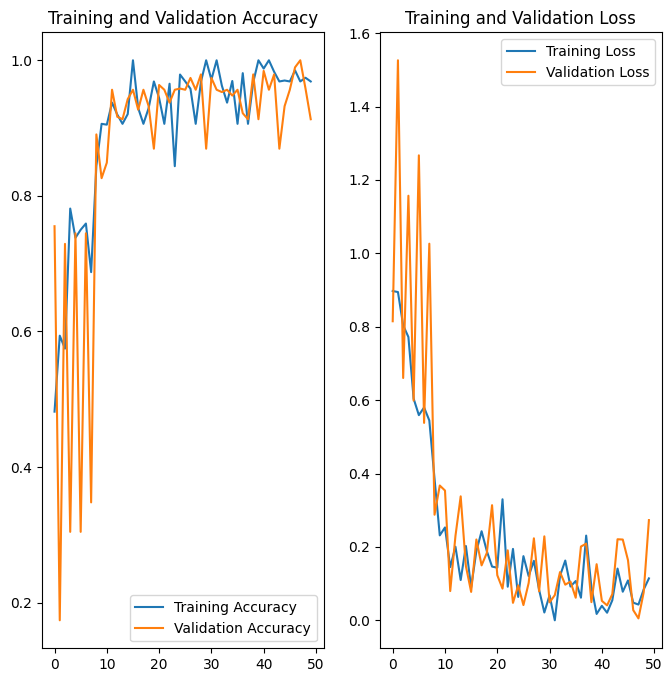

In [27]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Potato___Early_blight


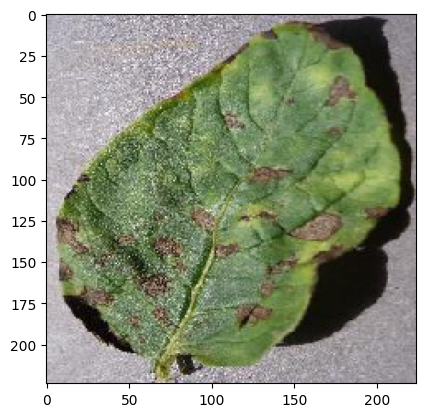

In [28]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


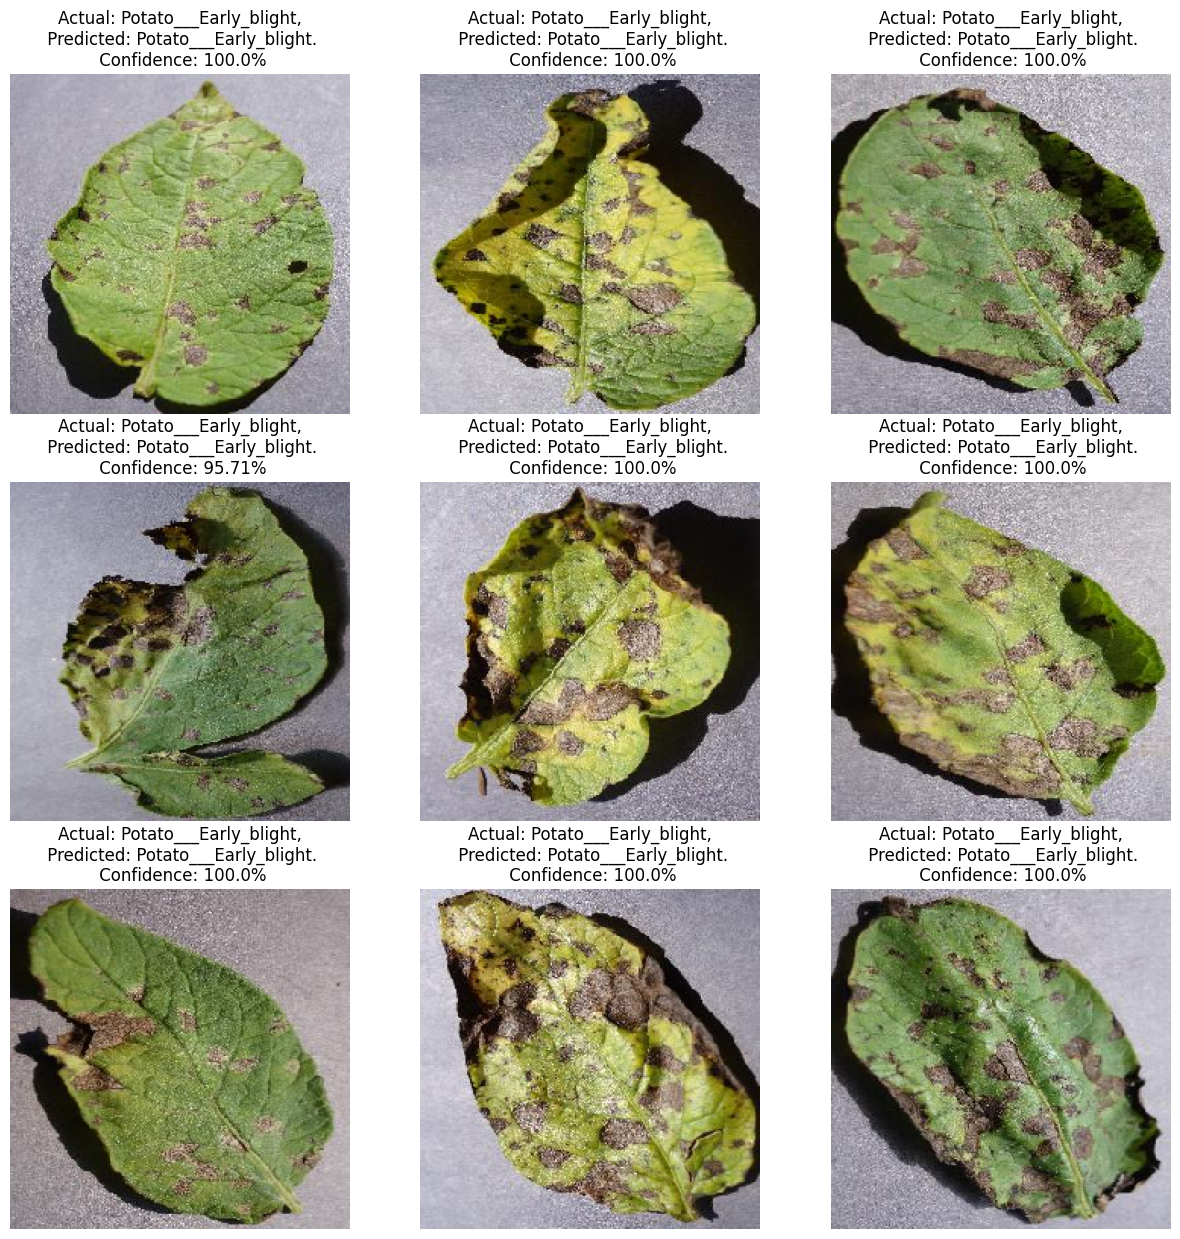

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [31]:
model.save(r"D:\Study\plant disease project\models\final1.keras")

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 486ms/step


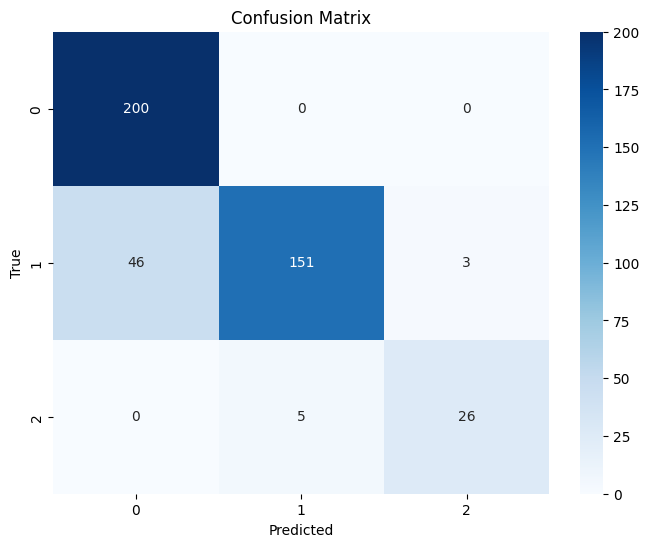

Classification Report:
                       precision    recall  f1-score   support

Potato___Early_blight       0.81      1.00      0.90       200
 Potato___Late_blight       0.97      0.76      0.85       200
     Potato___healthy       0.90      0.84      0.87        31

             accuracy                           0.87       431
            macro avg       0.89      0.86      0.87       431
         weighted avg       0.89      0.87      0.87       431

Accuracy: 87.47%


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)  


y_true = test_generator.classes  


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


print('Classification Report:')
target_names = list(test_generator.class_indices.keys())  
print(classification_report(y_true, y_pred, target_names=target_names))

